<a href="https://colab.research.google.com/github/ecece4/trafik_yogunluk_analyze/blob/main/2021_2_mayis_trafik_yo%C4%9Funlu%C4%9Fu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2021Mayis/2021Mayis.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121215 entries, 0 to 121214
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATE_TIME           121215 non-null  object 
 1   LONGITUDE           121215 non-null  float64
 2   LATITUDE            121215 non-null  float64
 3   GEOHASH             121215 non-null  object 
 4   MINIMUM_SPEED       121215 non-null  int64  
 5   MAXIMUM_SPEED       121215 non-null  int64  
 6   AVERAGE_SPEED       121215 non-null  int64  
 7   NUMBER_OF_VEHICLES  121215 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 7.4+ MB


In [ ]:
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])
df["Saat"]= df["DATE_TIME"].dt.strftime('%H')
df["Gün"]= df["DATE_TIME"].dt.strftime('%d')

In [ ]:
df = df.drop("DATE_TIME",axis=1)

In [ ]:
df=df.drop("GEOHASH",axis=1)

In [ ]:
df.shape

(121215, 8)

In [ ]:
df.dtypes

LONGITUDE             float64
LATITUDE              float64
MINIMUM_SPEED           int64
MAXIMUM_SPEED           int64
AVERAGE_SPEED           int64
NUMBER_OF_VEHICLES      int64
Saat                   object
Gün                    object
dtype: object

In [ ]:
df["Gün"] = df["Gün"].astype(str).astype(int)
df["Saat"] = df["Saat"].astype(str).astype(int)


In [ ]:
df.rename(columns={
    "DATE_TIME": "Tarih", "LONGITUDE": "Enlem", "LATITUDE": "Boylam", "MINIMUM_SPEED": "Min_Hız",
    "MAXIMUM_SPEED": "Max_Hız","AVERAGE_SPEED":"Ort_Hız","NUMBER_OF_VEHICLES":"Araç Sayısı"
}, inplace=True)

In [ ]:
df = df[df.Gün ==2]

SADECE 2 MAYIS VERİLERİNİ KULLANARAK DEVAM EDECEĞİZ ANALİZE

In [ ]:
df

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
4,28.778687,41.212463,8,86,39,38,16,2
6,28.756714,41.058655,9,139,73,142,22,2
11,29.031372,41.157532,3,95,41,12,22,2
12,28.998413,41.069641,1,75,23,25,7,2
23,29.152222,40.943298,10,67,32,28,18,2
...,...,...,...,...,...,...,...,...
121200,29.382935,40.794983,20,131,81,80,14,2
121201,29.042358,40.998230,5,68,34,18,0,2
121208,28.822632,41.031189,4,72,31,40,17,2
121210,28.394165,41.069641,55,136,85,50,12,2


In [ ]:
df.describe()

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
count,37253.000000,37253.000000,37253.000000,37253.000000,37253.000000,37253.000000,37253.000000,37253.0
mean,28.880517,41.056008,23.786997,112.218076,61.606475,46.479961,12.516039,2.0
std,0.328663,0.097826,22.472966,34.688725,22.367951,40.563284,6.441374,0.0
min,27.965698,40.767517,1.000000,23.000000,12.000000,11.000000,0.000000,2.0
25%,28.712769,40.998230,6.000000,84.000000,41.000000,19.000000,8.000000,2.0
50%,28.899536,41.053162,12.000000,114.000000,65.000000,31.000000,13.000000,2.0
75%,29.119263,41.108093,43.000000,139.000000,81.000000,59.000000,18.000000,2.0
max,29.602661,41.344299,100.000000,242.000000,134.000000,350.000000,23.000000,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37253 entries, 4 to 121212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Enlem        37253 non-null  float64
 1   Boylam       37253 non-null  float64
 2   Min_Hız      37253 non-null  int64  
 3   Max_Hız      37253 non-null  int64  
 4   Ort_Hız      37253 non-null  int64  
 5   Araç Sayısı  37253 non-null  int64  
 6   Saat         37253 non-null  int64  
 7   Gün          37253 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


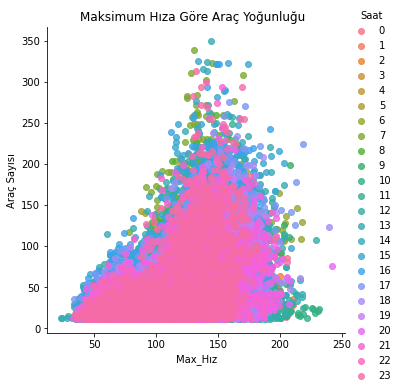

In [ ]:
sns.lmplot(x="Max_Hız", y="Araç Sayısı",hue ="Saat", data=df, fit_reg=False)
plt.title("Maksimum Hıza Göre Araç Yoğunluğu  ")
plt.show()

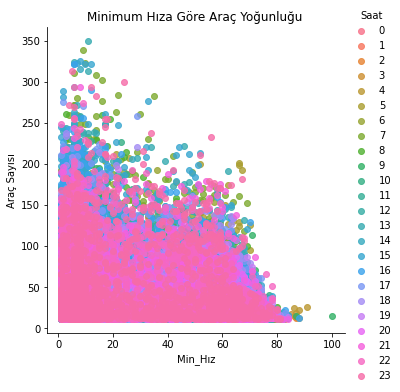

In [ ]:
sns.lmplot(x="Min_Hız", y="Araç Sayısı",hue = "Saat",data=df, fit_reg=False)
plt.title("Minimum Hıza Göre Araç Yoğunluğu ")
plt.show()

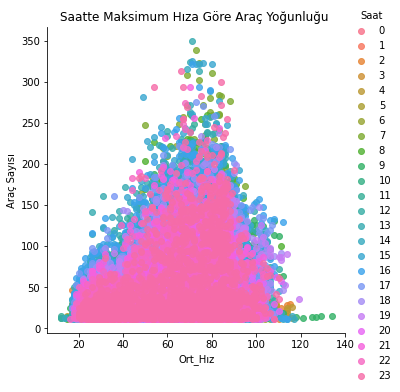

In [ ]:
sns.lmplot(x="Ort_Hız", y="Araç Sayısı",hue="Saat", data=df, fit_reg=False)
plt.title("Saatte Maksimum Hıza Göre Araç Yoğunluğu ")
plt.show()

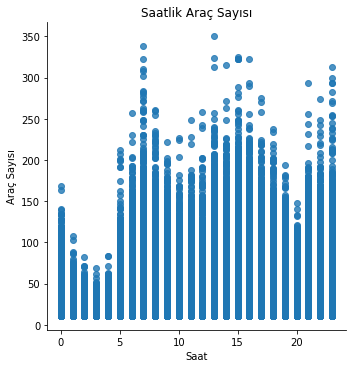

In [ ]:
sns.lmplot(x="Saat", y="Araç Sayısı", data=df, fit_reg=False)
plt.title("Saatlik Araç Sayısı")
plt.show()

**YOĞUNLUK GRAFİKLERİ**

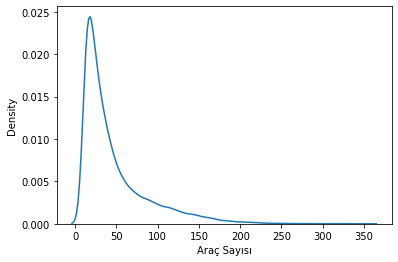

In [ ]:
sns.kdeplot(df['Araç Sayısı'])

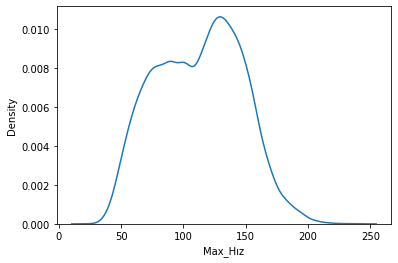

In [ ]:
sns.kdeplot(df['Max_Hız'])

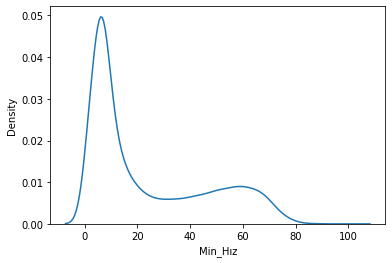

In [ ]:
sns.kdeplot(df['Min_Hız'])

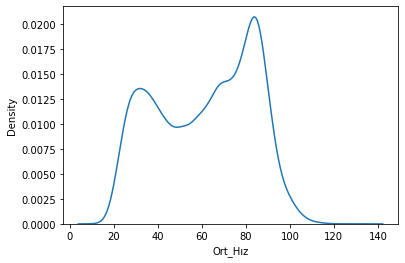

In [ ]:
sns.kdeplot(df['Ort_Hız'])

AYKIRI VERİLER GRAFİKLERİ

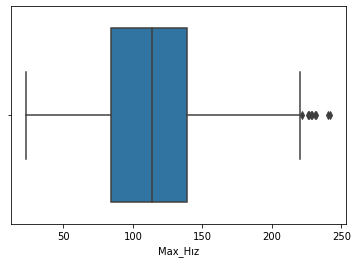

In [ ]:
 sns.boxplot(x=df["Max_Hız"])

ortalama hızın aykırı değer grafiği

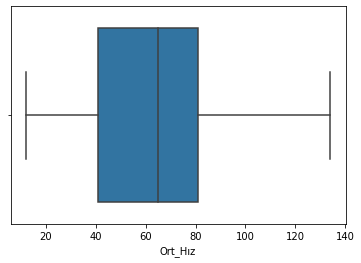

In [ ]:
 sns.boxplot(x=df["Ort_Hız"])

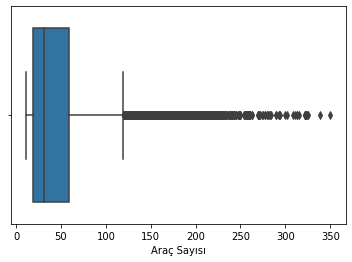

In [ ]:
 sns.boxplot(x=df["Araç Sayısı"])

Görüldüğü üzere araç sayısında çok fazla aykırı değer bulunmakta

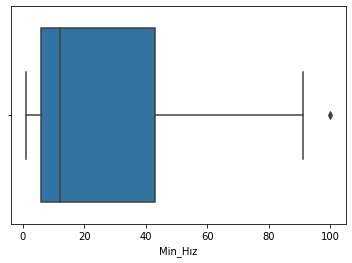

In [ ]:
 sns.boxplot(x=df["Min_Hız"])

KUTU GRAFİĞİNDE GÖRÜLEN AYKIRI DEĞERLERİN (MİN SPEED MAX SPEED) ANALİZİ


In [ ]:
df_max = df["Max_Hız"]

In [ ]:
Q1 = df_max .quantile(0.25)
Q3 = df_max .quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5) * IQR
upper_bound =  Q3 + (1.5) * IQR

lower_outliers = (df_max  < (lower_bound))

upper_outliers = (df_max  > (upper_bound))

outliers = ((df_max < (lower_bound)) |  (df_max  > (upper_bound)) )

IQR çeyrekler açıklıktır orta %50'yi bulmak için 0.25 ve 0.75 formülden gelir.

In [ ]:
lower_bound

1.5

In [ ]:
upper_bound

221.5

In [ ]:
df_max

4          86
6         139
11         95
12         75
23         67
         ... 
121200    131
121201     68
121208     72
121210    136
121212    100
Name: Max_Hız, Length: 37253, dtype: int64

In [ ]:
df_max[lower_outliers].shape[0] + df_max[upper_outliers].shape[0]

9

9 adet aykırı veri bulundu

In [ ]:
df[outliers]

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
2598,29.053345,41.091614,12,240,95,123,18,2
77649,29.119263,41.025696,7,229,81,107,12,2
81081,29.119263,41.025696,12,242,86,76,20,2
87320,28.372192,41.168518,77,222,100,13,10,2
93409,28.449097,41.174011,55,231,93,21,10,2
104664,28.536987,41.168518,66,226,94,24,10,2
107606,28.295288,41.141052,59,228,93,18,10,2
116286,28.273315,41.146545,70,232,95,23,10,2
120421,28.526001,41.168518,75,227,96,23,10,2


AYKIRI VERİLERİ BASKILAMA YÖNTEMİYLE DOLDURDUK


In [ ]:
df_max[lower_outliers] = lower_bound
df_max[upper_outliers] = upper_bound

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_max

4          86.0
6         139.0
11         95.0
12         75.0
23         67.0
          ...  
121200    131.0
121201     68.0
121208     72.0
121210    136.0
121212    100.0
Name: Max_Hız, Length: 37253, dtype: float64

MAKSIMUM HIZDAKİ AYKIRI DEĞERLERİ İŞLEDİK MINIMUM HIZDA AZ DA OLSA AYKIRI DEĞER GÖRÜNÜYORDU BAKALIM

In [ ]:
df_min = df["Min_Hız"]

In [ ]:
Q1 = df_min .quantile(0.25)
Q3 = df_min .quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5) * IQR
upper_bound =  Q3 + (1.5) * IQR

lower_outliers = (df_min  < (lower_bound))

upper_outliers = (df_min  > (upper_bound))

outliers = ((df_min < (lower_bound)) |  (df_min  > (upper_bound)) )

In [ ]:
lower_bound

-49.5

In [ ]:
upper_bound

98.5

In [ ]:
df_min[lower_outliers].shape[0] + df_min[upper_outliers].shape[0]

1

In [ ]:
df_min[upper_outliers].shape[0]

1

In [ ]:
df[outliers]

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
7671,29.152222,41.047668,100,165.0,134,15,9,2


In [ ]:
df_min[upper_outliers] = upper_bound

In [ ]:
df_min

4          8.0
6          9.0
11         3.0
12         1.0
23        10.0
          ... 
121200    20.0
121201     5.0
121208     4.0
121210    55.0
121212     6.0
Name: Min_Hız, Length: 37253, dtype: float64

In [ ]:
df

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
4,28.778687,41.212463,8.0,86.0,39,38,16,2
6,28.756714,41.058655,9.0,139.0,73,142,22,2
11,29.031372,41.157532,3.0,95.0,41,12,22,2
12,28.998413,41.069641,1.0,75.0,23,25,7,2
23,29.152222,40.943298,10.0,67.0,32,28,18,2
...,...,...,...,...,...,...,...,...
121200,29.382935,40.794983,20.0,131.0,81,80,14,2
121201,29.042358,40.998230,5.0,68.0,34,18,0,2
121208,28.822632,41.031189,4.0,72.0,31,40,17,2
121210,28.394165,41.069641,55.0,136.0,85,50,12,2


In [ ]:
df_vehicle = df["Araç Sayısı"]

In [ ]:
Q1 = df_vehicle  .quantile(0.25)
Q3 = df_vehicle .quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5) * IQR
upper_bound =  Q3 + (1.5) * IQR

lower_outliers = (df_vehicle   < (lower_bound))

upper_outliers = (df_vehicle   > (upper_bound))

outliers = ((df_vehicle  < (lower_bound)) |  (df_vehicle   > (upper_bound)) )

In [ ]:
lower_bound

-41.0

In [ ]:
df_vehicle[lower_outliers].shape[0]

0

In [ ]:
upper_bound

119.0

In [ ]:
df_vehicle[upper_outliers].shape[0]

2650

In [ ]:
df_vehicle[lower_outliers].shape[0] + df_vehicle[upper_outliers].shape[0]

2650

In [ ]:
df[outliers]

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
6,28.756714,41.058655,9.0,139.0,73,142,22,2
174,28.833618,41.064148,6.0,155.0,78,191,22,2
188,28.800659,41.239929,62.0,151.0,84,174,5,2
204,28.811646,41.036682,5.0,127.0,74,145,23,2
222,29.328003,40.937805,6.0,167.0,77,212,7,2
...,...,...,...,...,...,...,...,...
120924,29.371948,40.899353,37.0,166.0,85,163,23,2
121080,29.009399,41.064148,2.0,119.0,54,134,13,2
121083,28.998413,41.064148,3.0,128.0,53,127,8,2
121088,28.822632,40.998230,12.0,110.0,69,135,22,2


In [ ]:
df_vehicle[upper_outliers] = upper_bound

In [ ]:
df_vehicle

4          38
6         119
11         12
12         25
23         28
         ... 
121200     80
121201     18
121208     40
121210     50
121212     17
Name: Araç Sayısı, Length: 37253, dtype: int64

In [ ]:
df

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
4,28.778687,41.212463,8.0,86.0,39,38,16,2
6,28.756714,41.058655,9.0,139.0,73,119,22,2
11,29.031372,41.157532,3.0,95.0,41,12,22,2
12,28.998413,41.069641,1.0,75.0,23,25,7,2
23,29.152222,40.943298,10.0,67.0,32,28,18,2
...,...,...,...,...,...,...,...,...
121200,29.382935,40.794983,20.0,131.0,81,80,14,2
121201,29.042358,40.998230,5.0,68.0,34,18,0,2
121208,28.822632,41.031189,4.0,72.0,31,40,17,2
121210,28.394165,41.069641,55.0,136.0,85,50,12,2


BÖYLELİKLE AYKIRI VERİLERİMİZİN TAMAMINI ÇEYREKLER AÇIKLIK IQR YÖNTEMİ İLE TESPİT ETMİŞ OLDUK VE DEĞERLERİMİZİ SİLMEK YERİNE BASKILADIK


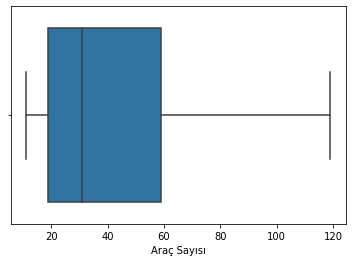

In [ ]:
sns.boxplot(x=df["Araç Sayısı"])

HİÇ AYKIRI DEĞER KALMADIĞINI GÖREBİLİYORUZ

**KORELASYON ANALİZİ**

FEATURLARIN ARAÇ SAYISIYLA İLİŞKİSİNİ BULMAK İÇİN HESAPLADIK


In [ ]:
x = df["Ort_Hız"]
y = df['Araç Sayısı']
x.corr(y)

0.22680507178466372

In [ ]:
x = df["Max_Hız"]
y = df['Araç Sayısı']
x.corr(y)

0.461576517743141

In [ ]:
df.corr(method='spearman')

,Enlem,Boylam,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,Saat,Gün
Enlem,1.000000,-0.548881,-0.176449,-0.056561,-0.142927,0.155080,0.004420,NaN
Boylam,-0.548881,1.000000,0.349189,0.118155,0.277603,-0.111843,-0.013294,NaN
Min_Hız,-0.176449,0.349189,1.000000,0.468111,0.785585,-0.170107,-0.080694,NaN
Max_Hız,-0.056561,0.118155,0.468111,1.000000,0.813823,0.452306,0.017869,NaN
Ort_Hız,-0.142927,0.277603,0.785585,0.813823,1.000000,0.181261,-0.038319,NaN
Araç Sayısı,0.155080,-0.111843,-0.170107,0.452306,0.181261,1.000000,0.152974,NaN
Saat,0.004420,-0.013294,-0.080694,0.017869,-0.038319,0.152974,1.000000,NaN
Gün,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x = df["Min_Hız"]
y = df['Araç Sayısı']
x.corr(y)

-0.16433918827262972

KORELASON SONUCU VERİLERİ ZAYIF GELDİ.

**ANALİZ KISMI**

In [ ]:
x = df.copy()

önce kümeleme yapıp sonra kendimiz knn uygulayıp trafik olup olmadığını belirteceğiz

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37253 entries, 4 to 121212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Enlem        37253 non-null  float64
 1   Boylam       37253 non-null  float64
 2   Min_Hız      37253 non-null  int64  
 3   Max_Hız      37253 non-null  int64  
 4   Ort_Hız      37253 non-null  int64  
 5   Araç Sayısı  37253 non-null  int64  
 6   Saat         37253 non-null  int64  
 7   Gün          37253 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


In [ ]:
x = x.drop("Enlem",axis=1)
x = x.drop("Boylam",axis=1)
x = x.drop("Saat", axis =1)
x = x.drop("Gün",axis=1)

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

Şimdi normalisayon yapmamız gerekiyor. Normalizasyon , bizim daha sağlıklı ve doğru işlemler yapmamızı sağlar

In [ ]:
liste =[]
for i in range(1,5):
  kmeans = KMeans(i)
  kmeans.fit(x)
  liste.append(kmeans.inertia_)

<function matplotlib.pyplot.show>

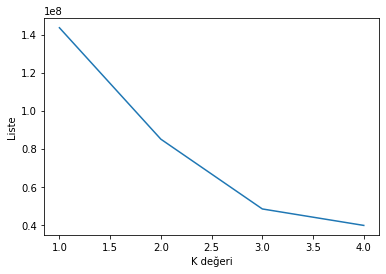

In [ ]:
plt.plot(range(1,5),liste)
plt.xlabel("K değeri")
plt.ylabel("Liste")
plt.show

K=2 ALALIM

In [ ]:
kmeans=KMeans(2)
kmeans.fit(scaled_x)

KMeans(n_clusters=2)

In [ ]:
#x datamıza göre modeli tahminliyoruz
cluster =x.copy()
cluster["cluster_pred"]= kmeans.fit_predict(scaled_x)
cluster

,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,cluster_pred
4,8,86,39,38,0
6,9,139,73,142,1
11,3,95,41,12,0
12,1,75,23,25,0
23,10,67,32,28,0
...,...,...,...,...,...
121200,20,131,81,80,1
121201,5,68,34,18,0
121208,4,72,31,40,0
121210,55,136,85,50,1


In [ ]:
cluster.head(40)

,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,cluster_pred
4,8,86,39,38,0
6,9,139,73,142,1
11,3,95,41,12,0
12,1,75,23,25,0
23,10,67,32,28,0
26,3,52,26,26,0
27,13,119,50,28,0
33,5,120,61,46,0
37,6,52,24,20,0
39,55,169,89,86,1


In [ ]:
cluster

,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,cluster_pred
4,8,86,39,38,0
6,9,139,73,142,1
11,3,95,41,12,0
12,1,75,23,25,0
23,10,67,32,28,0
...,...,...,...,...,...
121200,20,131,81,80,1
121201,5,68,34,18,0
121208,4,72,31,40,0
121210,55,136,85,50,1


In [ ]:
cluster.tail(50)

,Min_Hız,Max_Hız,Ort_Hız,Araç Sayısı,cluster_pred
121036,35,194,71,33,1
121041,62,141,92,15,1
121043,57,138,79,116,1
121045,48,128,87,15,1
121053,18,134,83,43,1
121054,2,57,23,17,0
121061,5,67,31,27,0
121064,4,105,54,91,0
121067,12,107,48,18,0
121076,21,86,49,20,0


GÖZLEMLER SONUCU

1--> AZ YOĞUNLUK (mor)







0--> ÇOK YOĞUNLUK (kırmızı)

<function matplotlib.pyplot.show>

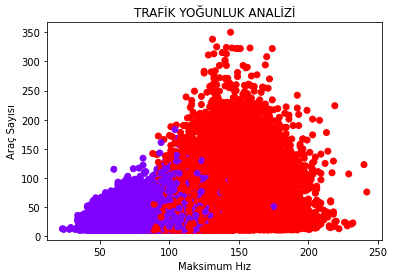

In [ ]:
plt.scatter(df["Max_Hız"],cluster["Araç Sayısı"],c=cluster["cluster_pred"],cmap="rainbow")
plt.title("TRAFİK YOĞUNLUK ANALİZİ")
plt.ylabel("Araç Sayısı")
plt.xlabel("Maksimum Hız")
plt.show

<function matplotlib.pyplot.show>

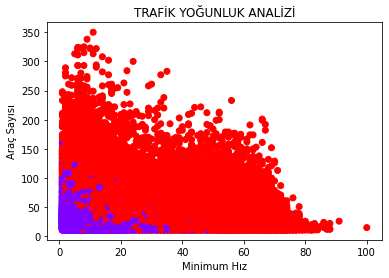

In [ ]:
plt.scatter(cluster["Min_Hız"],cluster["Araç Sayısı"],c=cluster["cluster_pred"],cmap="rainbow")
plt.title("TRAFİK YOĞUNLUK ANALİZİ")
plt.ylabel("Araç Sayısı")
plt.xlabel("Minimum Hız")
plt.show

<function matplotlib.pyplot.show>

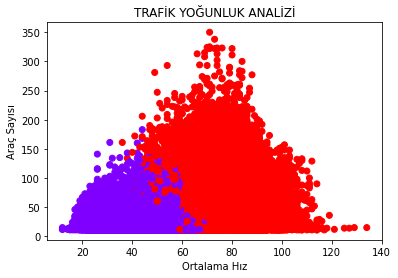

In [ ]:
plt.scatter(cluster["Ort_Hız"],cluster["Araç Sayısı"],c=cluster["cluster_pred"],cmap="rainbow")
plt.title("TRAFİK YOĞUNLUK ANALİZİ")
plt.ylabel("Araç Sayısı")
plt.xlabel("Ortalama Hız")
plt.show